In [112]:
import math
distance = [math.dist(instance,p) for p in points]
class KNN:
    def __init__(self, points, labels):
        self.points = points
        self.labels = labels
        self.distance = None
    def distances_euledian(self,instance):
        distance = [math.dist(instance,p) for p in self.points]
        self.distance = distance
        return distance
    
    def distance_minkowski(self, instance):
        p = 3
        distance = [((np.abs(p[0]-instance[0])+np.abs(p[1]-instance[1]))**3)**(1/3) for p in self.points]
        self.distance = distance
        return distance

    def distance_manhatten(self,instance):
        distance = [(np.abs(p[0]-instance[0])+np.abs(p[1]-instance[1])) for p in self.points]
        self.distance = distance
        return distance
    
    def clasifier(self,k):
        combined_data = [{'points': p, 'labels': l, 'distance': d} for p, l, d in zip(self.points, self.labels, self.distance)]
        sorted_data = sorted(combined_data, key=lambda x: x['distance'])
        labels =[]
        op = {}
        for row in range(k):
            labels.append(sorted_data[row]['labels'])
        for item in labels:
            if item not in op:
                op[item] = 1
            else:
                op[item]+=1

        op_class = max(op, key=lambda x:op[x])
        return op_class
        

In [81]:
points = [
    [7,7],
    [7,4],
    [3,4],
    [1,4],
    [4,5],
    [3,5],
    [4,6],
    [8,7],
    [7,9],
    [8,8],
]
labels=[
    'bad',
    'bad',
    'good',
    'good',
    'bad',
    'good',
    'bad',
    'bad',
    'good',
    'bad',
]

In [115]:

instance = [3,7]
c1 = KNN(points,labels)
c1.distances_euledian(instance)
print("eucluidan=>",c1.clasifier(5))
c1.distance_minkowski(instance)
print("mankovski=>",c1.clasifier(5))
c1.distance_manhatten(instance)
print("manhatten=>",c1.clasifier(5))

eucluidan=> good
mankovski=> bad
manhatten=> bad


/home/Student/.local/lib/python3.8/site-packages/sklearn/inspection/_plot/decision_boundary.py:186: UserWarning: The following kwargs were not used by contour: 'title'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


<Figure size 576x432 with 0 Axes>

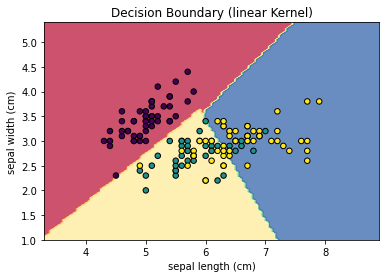

/home/Student/.local/lib/python3.8/site-packages/sklearn/inspection/_plot/decision_boundary.py:186: UserWarning: The following kwargs were not used by contour: 'title'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


<Figure size 576x432 with 0 Axes>

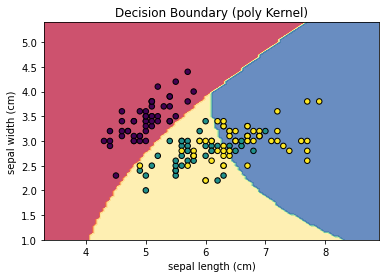

/home/Student/.local/lib/python3.8/site-packages/sklearn/inspection/_plot/decision_boundary.py:186: UserWarning: The following kwargs were not used by contour: 'title'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


<Figure size 576x432 with 0 Axes>

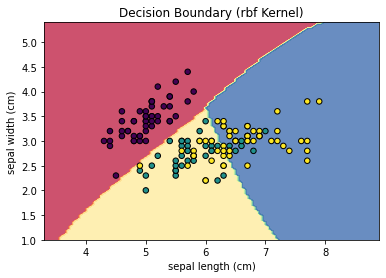

/home/Student/.local/lib/python3.8/site-packages/sklearn/inspection/_plot/decision_boundary.py:186: UserWarning: The following kwargs were not used by contour: 'title'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


<Figure size 576x432 with 0 Axes>

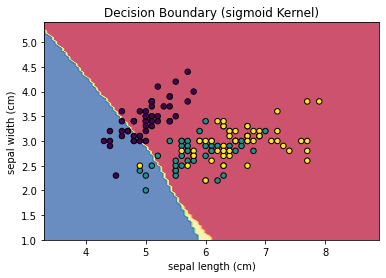

In [114]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]
y = iris.target

# Function to plot decision boundary
def plot_decision_boundary(X, y, svm, kernel_name):
    svm.fit(X, y)
   
    plt.figure(figsize=(8, 6))
   
    # Decision Boundary
    DecisionBoundaryDisplay.from_estimator(
        svm,
        X,
        response_method="predict",
        cmap=plt.cm.Spectral,
        alpha=0.8,
        title=f'Decision Boundary ({kernel_name} Kernel)',
    )

    # Scatter plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors="k")
   
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.title(f'Decision Boundary ({kernel_name} Kernel)')
    plt.show()

# Apply different kernel functions
kernels = ["linear", "poly", "rbf", "sigmoid"]
for kernel in kernels:
    svm = SVC(kernel=kernel)
    plot_decision_boundary(X, y, svm, kernel)

